Tail Entity to Label Mapping: {'France': 0, 'Germany': 1, 'England': 2, 'USA': 3, 'Japan': 4, 'Italy': 5, 'Spain': 6}
Complexity Score (CSG): [1.87037106]


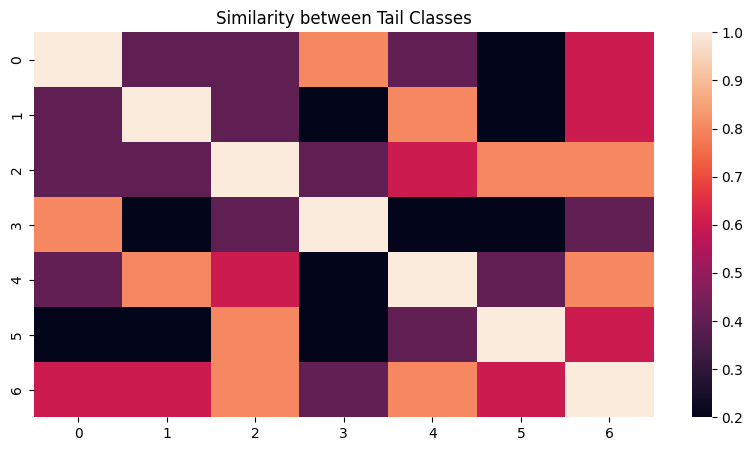

Class with the highest entropy (most confused): 6


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from spectral_metric.estimator import CumulativeGradientEstimator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Sample 15 triplets (head, relation, tail)
data = pd.DataFrame({
    'head': ['Paris', 'Berlin', 'London', 'New York', 'Tokyo', 'Rome', 'Madrid', 'Los Angeles', 'Paris', 'Rome', 'Berlin', 'Tokyo', 'London', 'New York', 'Los Angeles'],
    'relation': ['capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of', 'capital of'],
    'tail': ['France', 'Germany', 'England', 'USA', 'Japan', 'Italy', 'Spain', 'USA', 'France', 'Italy', 'Germany', 'Japan', 'England', 'USA', 'USA']
})

# Step 1: Organize the Data by Tail Entities (Classes)
tail_classes = {}
for idx, row in data.iterrows():
    tail = row['tail']
    composite_vector = np.array([row['head'], row['relation']])

    if tail not in tail_classes:
        tail_classes[tail] = []
    tail_classes[tail].append(composite_vector)

# Step 2: Map Tail Entities (Strings) to Integer Labels
tail_entity_to_label = {tail: idx for idx, tail in enumerate(tail_classes.keys())}
print(f"Tail Entity to Label Mapping: {tail_entity_to_label}")

# Map the tail entities in the dataset to integer labels
data['tail_label'] = data['tail'].map(tail_entity_to_label)

# Step 3: Generate Embeddings for Head and Relation
embedder = SentenceTransformer('all-MiniLM-L12-v2')

# Generate embeddings for head and relation entities
head_embeddings = embedder.encode(data['head'].tolist(), convert_to_tensor=True)
relation_embeddings = embedder.encode(data['relation'].tolist(), convert_to_tensor=True)

# Concatenate head and relation embeddings
composite_embeddings = np.concatenate((head_embeddings, relation_embeddings), axis=1)

# Step 4: Group by Tail and Create the Data Arrays for Spectral Metric
all_embeddings = []
all_labels = []
for idx, row in data.iterrows():
    composite_vector = composite_embeddings[idx]
    tail_label = row['tail_label']
    all_embeddings.append(composite_vector)
    all_labels.append(tail_label)

# Convert to numpy arrays
X = np.array(all_embeddings)
y = np.array(all_labels)

# Step 5: Fit the CumulativeGradientEstimator
estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")

# Fit the estimator on the data
estimator.fit(data=X, target=y)

# Step 6: Compute and Print CSG (Complexity Score)
csg = estimator.csg
print("Complexity Score (CSG):", csg)

# Step 7: Visualize the Similarity Matrix (W Matrix)
plt.figure(figsize=(10,5))
sns.heatmap(estimator.W)
plt.title("Similarity between Tail Classes")
plt.show()

# Step 8: Compute Entropy (Most Confused Class)
# Compute the entropy of each row of the W matrix
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
most_confused_class = np.argmax(entropy_per_class)
print("Class with the highest entropy (most confused):", most_confused_class)


Tail Entity to Label Mapping: {'uk': 0, 'usa': 1, 'ussr': 2, 'india': 3, 'egypt': 4, 'netherlands': 5, 'indonesia': 6, 'israel': 7, 'brazil': 8, 'cuba': 9, 'china': 10, 'poland': 11, 'jordan': 12, 'burma': 13}
Complexity Score (CSG): [9.21792752]


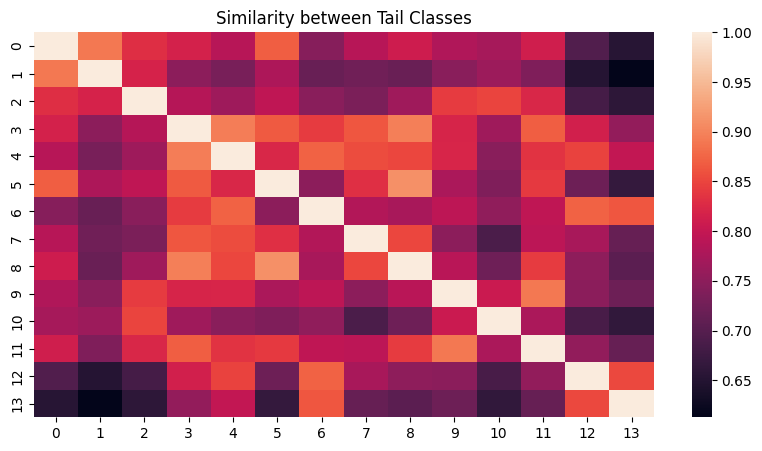

Class with the highest entropy (most confused): 3


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from spectral_metric.estimator import CumulativeGradientEstimator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os

# Path to the dataset
data_path = r'D:\Complexities_papers\data\Nations'

# Step 1: Load the Train, Valid, and Test Triplets
train_file = os.path.join(data_path, 'train.txt')  # Adjust the file name if needed
valid_file = os.path.join(data_path, 'valid.txt')
test_file = os.path.join(data_path, 'test.txt')

# Load triplets into dataframes (assuming tab-separated text files, adjust delimiter if needed)
train_data = pd.read_csv(train_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
valid_data = pd.read_csv(valid_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
test_data = pd.read_csv(test_file, sep="\t", header=None, names=['head', 'relation', 'tail'])

# Step 2: Combine all triplets into a single dataset
all_data = pd.concat([train_data, valid_data, test_data], ignore_index=True)

# Step 3: Organize the Data by Tail Entities (Classes)
tail_classes = {}
for idx, row in all_data.iterrows():
    tail = row['tail']
    composite_vector = np.array([row['head'], row['relation']])

    if tail not in tail_classes:
        tail_classes[tail] = []
    tail_classes[tail].append(composite_vector)

# Step 4: Map Tail Entities (Strings) to Integer Labels
tail_entity_to_label = {tail: idx for idx, tail in enumerate(tail_classes.keys())}
print(f"Tail Entity to Label Mapping: {tail_entity_to_label}")

# Map the tail entities in the dataset to integer labels
all_data['tail_label'] = all_data['tail'].map(tail_entity_to_label)

# Step 5: Generate Embeddings for Head and Relation
embedder = SentenceTransformer('all-MiniLM-L12-v2')

# Generate embeddings for head and relation entities
head_embeddings = embedder.encode(all_data['head'].tolist(), convert_to_tensor=True)
relation_embeddings = embedder.encode(all_data['relation'].tolist(), convert_to_tensor=True)

# Concatenate head and relation embeddings
composite_embeddings = np.concatenate((head_embeddings, relation_embeddings), axis=1)

# Step 6: Group by Tail and Create the Data Arrays for Spectral Metric
all_embeddings = []
all_labels = []
for idx, row in all_data.iterrows():
    composite_vector = composite_embeddings[idx]
    tail_label = row['tail_label']
    all_embeddings.append(composite_vector)
    all_labels.append(tail_label)

# Convert to numpy arrays
X = np.array(all_embeddings)
y = np.array(all_labels)

# Step 7: Fit the CumulativeGradientEstimator
estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")

# Fit the estimator on the data
estimator.fit(data=X, target=y)

# Step 8: Compute and Print CSG (Complexity Score)
csg = estimator.csg
print("Complexity Score (CSG):", csg)

# Step 9: Visualize the Similarity Matrix (W Matrix)
plt.figure(figsize=(10,5))
sns.heatmap(estimator.W)
plt.title("Similarity between Tail Classes")
plt.show()

# Step 10: Compute Entropy (Most Confused Class)
# Compute the entropy of each row of the W matrix
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
most_confused_class = np.argmax(entropy_per_class)
print("Class with the highest entropy (most confused):", most_confused_class)


Tail Entity to Label Mapping: {'person80': 0, 'person72': 1, 'person39': 2, 'person87': 3, 'person48': 4, 'person45': 5, 'person40': 6, 'person13': 7, 'person69': 8, 'person0': 9, 'person100': 10, 'person11': 11, 'person62': 12, 'person66': 13, 'person70': 14, 'person73': 15, 'person60': 16, 'person50': 17, 'person38': 18, 'person90': 19, 'person14': 20, 'person53': 21, 'person28': 22, 'person95': 23, 'person41': 24, 'person99': 25, 'person65': 26, 'person7': 27, 'person15': 28, 'person1': 29, 'person63': 30, 'person96': 31, 'person37': 32, 'person78': 33, 'person81': 34, 'person83': 35, 'person33': 36, 'person29': 37, 'person58': 38, 'person52': 39, 'person32': 40, 'person67': 41, 'person101': 42, 'person8': 43, 'person36': 44, 'person102': 45, 'person23': 46, 'person89': 47, 'person5': 48, 'person26': 49, 'person86': 50, 'person91': 51, 'person4': 52, 'person21': 53, 'person42': 54, 'person22': 55, 'person103': 56, 'person76': 57, 'person47': 58, 'person46': 59, 'person25': 60, 'pers

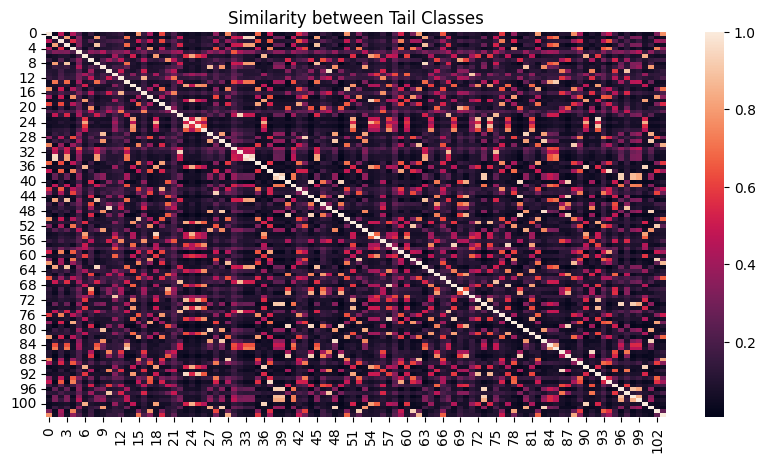

Class with the highest entropy (most confused): 5


In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from spectral_metric.estimator import CumulativeGradientEstimator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os

# Path to the dataset
data_path = r'D:\Complexities_papers\data\Kinship'

# Step 1: Load the Train, Valid, and Test Triplets
train_file = os.path.join(data_path, 'train.txt')  # Adjust the file name if needed
valid_file = os.path.join(data_path, 'valid.txt')
test_file = os.path.join(data_path, 'test.txt')

# Load triplets into dataframes (assuming tab-separated text files, adjust delimiter if needed)
train_data = pd.read_csv(train_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
valid_data = pd.read_csv(valid_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
test_data = pd.read_csv(test_file, sep="\t", header=None, names=['head', 'relation', 'tail'])

# Step 2: Combine all triplets into a single dataset
all_data = pd.concat([train_data, valid_data, test_data], ignore_index=True)

# Step 3: Organize the Data by Tail Entities (Classes)
tail_classes = {}
for idx, row in all_data.iterrows():
    tail = row['tail']
    composite_vector = np.array([row['head'], row['relation']])

    if tail not in tail_classes:
        tail_classes[tail] = []
    tail_classes[tail].append(composite_vector)

# Step 4: Map Tail Entities (Strings) to Integer Labels
tail_entity_to_label = {tail: idx for idx, tail in enumerate(tail_classes.keys())}
print(f"Tail Entity to Label Mapping: {tail_entity_to_label}")

# Map the tail entities in the dataset to integer labels
all_data['tail_label'] = all_data['tail'].map(tail_entity_to_label)

# Step 5: Generate Embeddings for Head and Relation
embedder = SentenceTransformer('all-MiniLM-L12-v2')

# Generate embeddings for head and relation entities
head_embeddings = embedder.encode(all_data['head'].tolist(), convert_to_tensor=True)
relation_embeddings = embedder.encode(all_data['relation'].tolist(), convert_to_tensor=True)

# Concatenate head and relation embeddings
composite_embeddings = np.concatenate((head_embeddings, relation_embeddings), axis=1)

# Step 6: Group by Tail and Create the Data Arrays for Spectral Metric
all_embeddings = []
all_labels = []
for idx, row in all_data.iterrows():
    composite_vector = composite_embeddings[idx]
    tail_label = row['tail_label']
    all_embeddings.append(composite_vector)
    all_labels.append(tail_label)

# Convert to numpy arrays
X = np.array(all_embeddings)
y = np.array(all_labels)

# Step 7: Fit the CumulativeGradientEstimator
estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")

# Fit the estimator on the data
estimator.fit(data=X, target=y)

# Step 8: Compute and Print CSG (Complexity Score)
csg = estimator.csg
print("Complexity Score (CSG):", csg)

# Step 9: Visualize the Similarity Matrix (W Matrix)
plt.figure(figsize=(10,5))
sns.heatmap(estimator.W)
plt.title("Similarity between Tail Classes")
plt.show()

# Step 10: Compute Entropy (Most Confused Class)
# Compute the entropy of each row of the W matrix
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
most_confused_class = np.argmax(entropy_per_class)
print("Class with the highest entropy (most confused):", most_confused_class)


c:\Users\Haji\miniconda3\envs\CSG\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tail Entity to Label Mapping: {'Q188': 0, 'Q12078': 1, 'Q656801': 2, 'Q7737': 3, 'Q1969730': 4, 'Q1476215': 5, 'Q3387717': 6, 'Q33999': 7, 'Q44855': 8, 'Q10798782': 9, 'Q201788': 10, 'Q1321': 11, 'Q971': 12, 'Q11063': 13, 'Q488205': 14, 'Q2259451': 15, 'Q46': 16, 'Q245068': 17, 'Q49085': 18, 'Q1930187': 19, 'Q30': 20, 'Q15981151': 21, 'Q376150': 22, 'Q37226': 23, 'Q49088': 24, 'Q753110': 25, 'Q152087': 26, 'Q213': 27, 'Q1297': 28, 'Q1860': 29, 'Q1049': 30, 'Q211': 31, 'Q182436': 32, 'Q36180': 33, 'Q1007': 34, 'Q843': 35, 'Q1622272': 36, 'Q5716684': 37, 'Q13590141': 38, 'Q93343': 39, 'Q486748': 40, 'Q41304': 41, 'Q193391': 42, 'Q117': 43, 'Q3282637': 44, 'Q2029901': 45, 'Q169470': 46, 'Q184485': 47, 'Q2374149': 48, 'Q14467526': 49, 'Q8261': 50, 'Q183387': 51, 'Q177220': 52, 'Q2643890': 53, 'Q639669': 54, 'Q6882': 55, 'Q17172850': 56, 'Q191384': 57, 'Q38': 58, 'Q252': 59, 'Q2526255': 60, 'Q652': 61, 'Q11900058': 62, 'Q684415': 63, 'Q408': 64, 'Q227': 65, 'Q221': 66, 'Q1246': 67, 'Q150': 

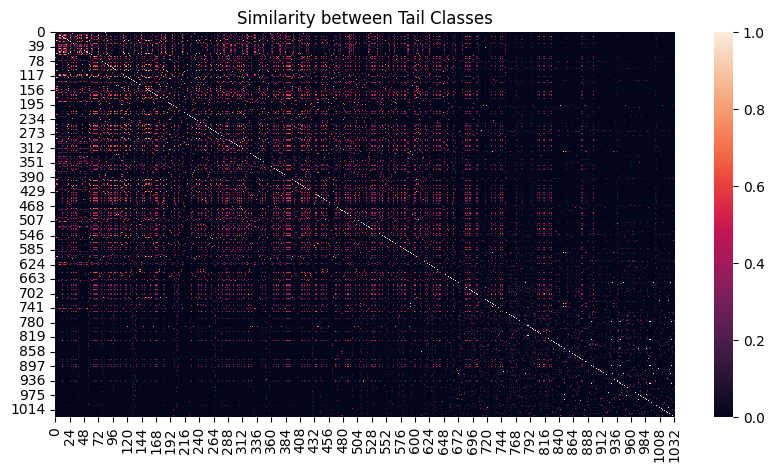

Class with the highest entropy (most confused): 82


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from spectral_metric.estimator import CumulativeGradientEstimator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os

# Path to the dataset
data_path = r'D:\Complexities_papers\data\codex-s'

# Step 1: Load the Train, Valid, and Test Triplets
train_file = os.path.join(data_path, 'train.txt')  # Adjust the file name if needed
valid_file = os.path.join(data_path, 'valid.txt')
test_file = os.path.join(data_path, 'test.txt')

# Load triplets into dataframes (assuming tab-separated text files, adjust delimiter if needed)
train_data = pd.read_csv(train_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
valid_data = pd.read_csv(valid_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
test_data = pd.read_csv(test_file, sep="\t", header=None, names=['head', 'relation', 'tail'])

# Step 2: Combine all triplets into a single dataset
all_data = pd.concat([train_data, valid_data, test_data], ignore_index=True)

# Step 3: Organize the Data by Tail Entities (Classes)
tail_classes = {}
for idx, row in all_data.iterrows():
    tail = row['tail']
    composite_vector = np.array([row['head'], row['relation']])

    if tail not in tail_classes:
        tail_classes[tail] = []
    tail_classes[tail].append(composite_vector)

# Step 4: Map Tail Entities (Strings) to Integer Labels
tail_entity_to_label = {tail: idx for idx, tail in enumerate(tail_classes.keys())}
print(f"Tail Entity to Label Mapping: {tail_entity_to_label}")

# Map the tail entities in the dataset to integer labels
all_data['tail_label'] = all_data['tail'].map(tail_entity_to_label)

# Step 5: Generate Embeddings for Head and Relation
embedder = SentenceTransformer('all-MiniLM-L12-v2')

# Generate embeddings for head and relation entities
head_embeddings = embedder.encode(all_data['head'].tolist(), convert_to_tensor=True)
relation_embeddings = embedder.encode(all_data['relation'].tolist(), convert_to_tensor=True)

# Concatenate head and relation embeddings
composite_embeddings = np.concatenate((head_embeddings, relation_embeddings), axis=1)

# Step 6: Group by Tail and Create the Data Arrays for Spectral Metric
all_embeddings = []
all_labels = []
for idx, row in all_data.iterrows():
    composite_vector = composite_embeddings[idx]
    tail_label = row['tail_label']
    all_embeddings.append(composite_vector)
    all_labels.append(tail_label)

# Convert to numpy arrays
X = np.array(all_embeddings)
y = np.array(all_labels)

# Step 7: Fit the CumulativeGradientEstimator
estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")

# Fit the estimator on the data
estimator.fit(data=X, target=y)

# Step 8: Compute and Print CSG (Complexity Score)
csg = estimator.csg
print("Complexity Score (CSG):", csg)

# Step 9: Visualize the Similarity Matrix (W Matrix)
plt.figure(figsize=(10,5))
sns.heatmap(estimator.W)
plt.title("Similarity between Tail Classes")
plt.show()

# Step 10: Compute Entropy (Most Confused Class)
# Compute the entropy of each row of the W matrix
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
most_confused_class = np.argmax(entropy_per_class)
print("Class with the highest entropy (most confused):", most_confused_class)


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from spectral_metric.estimator import CumulativeGradientEstimator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os

# Path to the dataset
data_path = r'D:\Complexities_papers\data\Nations'

# Step 1: Load the Train, Valid, and Test Triplets
train_file = os.path.join(data_path, 'train.txt')  # Adjust the file name if needed
valid_file = os.path.join(data_path, 'valid.txt')
test_file = os.path.join(data_path, 'test.txt')

# Load triplets into dataframes (assuming tab-separated text files, adjust delimiter if needed)
train_data = pd.read_csv(train_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
valid_data = pd.read_csv(valid_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
test_data = pd.read_csv(test_file, sep="\t", header=None, names=['head', 'relation', 'tail'])

# Step 2: Combine all triplets into a single dataset
all_data = pd.concat([train_data, valid_data, test_data], ignore_index=True)

# Step 3: Organize the Data by Tail Entities (Classes)
tail_classes = {}
for idx, row in all_data.iterrows():
    tail = row['tail']
    composite_vector = np.array([row['head'], row['relation']])

    if tail not in tail_classes:
        tail_classes[tail] = []
    tail_classes[tail].append(composite_vector)

# Step 4: Map Tail Entities (Strings) to Integer Labels
tail_entity_to_label = {tail: idx for idx, tail in enumerate(tail_classes.keys())}
print(f"Tail Entity to Label Mapping: {tail_entity_to_label}")

# Map the tail entities in the dataset to integer labels
all_data['tail_label'] = all_data['tail'].map(tail_entity_to_label)

# Step 5: Generate Embeddings for Head and Relation
embedder = SentenceTransformer('all-MiniLM-L12-v2')

# Generate embeddings for head and relation entities
head_embeddings = embedder.encode(all_data['head'].tolist(), convert_to_tensor=True)
relation_embeddings = embedder.encode(all_data['relation'].tolist(), convert_to_tensor=True)

# Concatenate head and relation embeddings
composite_embeddings = np.concatenate((head_embeddings, relation_embeddings), axis=1)

# Step 6: Group by Tail and Create the Data Arrays for Spectral Metric
all_embeddings = []
all_labels = []
for idx, row in all_data.iterrows():
    composite_vector = composite_embeddings[idx]
    tail_label = row['tail_label']
    all_embeddings.append(composite_vector)
    all_labels.append(tail_label)

# Convert to numpy arrays
X = np.array(all_embeddings)
y = np.array(all_labels)

# Step 7: Fit the CumulativeGradientEstimator
estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")

# Fit the estimator on the data
estimator.fit(data=X, target=y)

# Step 8: Compute and Print CSG (Complexity Score)
csg = estimator.csg
print("Complexity Score (CSG):", csg)

# Step 9: Visualize the Similarity Matrix (W Matrix)
plt.figure(figsize=(10,5))
sns.heatmap(estimator.W)
plt.title("Similarity between Tail Classes")
plt.show()

# Step 10: Compute Entropy (Most Confused Class)
# Compute the entropy of each row of the W matrix
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
most_confused_class = np.argmax(entropy_per_class)
print("Class with the highest entropy (most confused):", most_confused_class)


Tail Entity to Label Mapping: {'Q39792': 0, 'Q7809': 1, 'Q33999': 2, 'Q855091': 3, 'Q268970': 4, 'Q182973': 5, 'Q49085': 6, 'Q739': 7, 'Q14467526': 8, 'Q211346': 9, 'Q2259451': 10, 'Q142': 11, 'Q1622272': 12, 'Q1202021': 13, 'Q181754': 14, 'Q30': 15, 'Q1054574': 16, 'Q397': 17, 'Q1179603': 18, 'Q1860': 19, 'Q7737': 20, 'Q65': 21, 'Q1085': 22, 'Q1321': 23, 'Q6607': 24, 'Q154561': 25, 'Q265058': 26, 'Q49757': 27, 'Q2004963': 28, 'Q2405480': 29, 'Q245068': 30, 'Q993267': 31, 'Q309331': 32, 'Q1033': 33, 'Q377616': 34, 'Q16558': 35, 'Q970153': 36, 'Q440932': 37, 'Q1065': 38, 'Q639669': 39, 'Q752663': 40, 'Q183': 41, 'Q11399': 42, 'Q859369': 43, 'Q463303': 44, 'Q216364': 45, 'Q4853732': 46, 'Q15980158': 47, 'Q28389': 48, 'Q1022': 49, 'Q487596': 50, 'Q205375': 51, 'Q8646': 52, 'Q2516866': 53, 'Q684415': 54, 'Q172579': 55, 'Q18581305': 56, 'Q2112': 57, 'Q403': 58, 'Q108270': 59, 'Q40348': 60, 'Q797078': 61, 'Q11401': 62, 'Q10800557': 63, 'Q36834': 64, 'Q1542213': 65, 'Q1297': 66, 'Q48': 67, 'Q

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from spectral_metric.estimator import CumulativeGradientEstimator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os

# Path to the dataset
data_path = r'D:\Complexities_papers\data\codex-s'

# Step 1: Load the Train, Valid, and Test Triplets
train_file = os.path.join(data_path, 'train.txt')  # Adjust the file name if needed
valid_file = os.path.join(data_path, 'valid.txt')
test_file = os.path.join(data_path, 'test.txt')

# Load triplets into dataframes (assuming tab-separated text files, adjust delimiter if needed)
train_data = pd.read_csv(train_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
valid_data = pd.read_csv(valid_file, sep="\t", header=None, names=['head', 'relation', 'tail'])
test_data = pd.read_csv(test_file, sep="\t", header=None, names=['head', 'relation', 'tail'])

# Step 2: Combine all triplets into a single dataset
all_data = pd.concat([train_data, valid_data, test_data], ignore_index=True)

# Step 3: Organize the Data by Tail Entities (Classes)
tail_classes = {}
for idx, row in all_data.iterrows():  # Iterate over each row in the dataset
    tail = row['tail']  # The 'tail' is the entity we want to group by
    composite_vector = np.array([row['head'], row['relation']])  # Create a composite vector of head and relation

    if tail not in tail_classes:  # If the tail entity isn't in the dictionary, add it
        tail_classes[tail] = []
    tail_classes[tail].append(composite_vector)  # Append the composite vector to the corresponding tail class


'''
The purpose of Step 4 is to convert tail entity names (strings) into integer labels. 
This is crucial for machine learning algorithms (like the CumulativeGradientEstimator) 
that generally require numerical labels for classification or clustering tasks. In this 
case, the tail entities (e.g., "France", "Germany", "Japan") are categorical and 
represented as strings, which cannot be directly used in mathematical computations 
such as distance or similarity measurements. Therefore, we map these string  values to 
integer values, which are easier to process and work with in models.
'''
# Step 4: Map Tail Entities (Strings) to Integer Labels
tail_entity_to_label = {tail: idx for idx, tail in enumerate(tail_classes.keys())}  # Map each tail entity to an integer
print(f"Tail Entity to Label Mapping: {tail_entity_to_label}")

# Map the tail entities in the dataset to integer labels
all_data['tail_label'] = all_data['tail'].map(tail_entity_to_label)  # Create a new column for the integer labels of tail entities

# Step 5: Generate BERT Embeddings for Head and Relation
# Using BERT embeddings instead of Sentence-BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Initialize BERT tokenizer
bert_model = BertModel.from_pretrained('bert-base-uncased')  # Initialize BERT model

def get_bert_embeddings(texts):
    # Tokenize the input texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
    
    # Pass the tokens through the BERT model
    with torch.no_grad():
        outputs = bert_model(**inputs)
        
    # Extract the embeddings (last hidden state of BERT)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean over the sequence tokens
    return embeddings

# Generate BERT embeddings for head and relation entities
head_embeddings = get_bert_embeddings(all_data['head'].tolist())
relation_embeddings = get_bert_embeddings(all_data['relation'].tolist())

# Concatenate the embeddings to create composite embeddings
composite_embeddings = torch.cat((head_embeddings, relation_embeddings), dim=1)

# Step 6: Group by Tail and Create the Data Arrays for Spectral Metric
all_embeddings = []  # List to store all the composite embeddings
all_labels = []  # List to store the corresponding labels (tail entity labels)

for idx, row in all_data.iterrows():  # Iterate through all rows
    composite_vector = composite_embeddings[idx].numpy()  # Get the composite embedding for the current row
    tail_label = row['tail_label']  # Get the corresponding tail label
    all_embeddings.append(composite_vector)  # Append the composite embedding
    all_labels.append(tail_label)  # Append the label

# Convert the lists to numpy arrays
X = np.array(all_embeddings)  # Features (composite embeddings)
y = np.array(all_labels)  # Labels (tail entity labels)

# Step 7: Fit the CumulativeGradientEstimator
estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")  # Initialize the estimator with some parameters

# Fit the estimator on the data
estimator.fit(data=X, target=y)  # Fit the estimator with the features (X) and labels (y)

# Step 8: Compute and Print CSG (Complexity Score)
csg = estimator.csg  # Get the computed complexity score
print("Complexity Score (CSG):", csg)  # Print the complexity score

# Step 9: Visualize the Similarity Matrix (W Matrix)
plt.figure(figsize=(10,5))  # Set the figure size
sns.heatmap(estimator.W)  # Plot the heatmap of the similarity matrix
plt.title("Similarity between Tail Classes")  # Set the title of the plot
plt.show()  # Display the plot

# Step 10: Compute Entropy (Most Confused Class)
# Compute the entropy of each row of the W matrix
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)
most_confused_class = np.argmax(entropy_per_class)  # Find the class with the highest entropy
print("Class with the highest entropy (most confused):", most_confused_class)  # Print the result


In [1]:
import numpy as np
from scipy.stats import pearsonr

theirs = np.array([7.4742, 25.41, 11.5096, 53.8269, 1.2348, 7.6726])
yours  = np.array([0.607, 0.7147, 0.998, 0.846, 0.869, 0.650])

# Correlation only
corr, _ = pearsonr(theirs, yours)
print("Pearson correlation (raw):", corr)

# Correlation after scaling
scaled = yours * 12
corr_scaled, _ = pearsonr(theirs, scaled)
print("Pearson correlation (scaled):", corr_scaled)


Pearson correlation (raw): 0.14810781337564063
Pearson correlation (scaled): 0.14810781337564044
